In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import seaborn as sns

In [4]:
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [5]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
# add the prices to the df
bos["PRICE"] = boston.target

In [7]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
# hmm do linear regression from scratch or use a library?
res = sm.ols("PRICE ~ LSTAT", bos).fit()

(506,)

In [8]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 23 Jan 2017   Prob (F-statistic):           5.08e-88
Time:                        17:39:00   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000        33.448    35.659
LSTAT         -0.9500      0.039    -24.528      0.000        -1.026    -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# residual statistics
# lets also try with sklearn
residuals = res.resid
min_resid = min(residuals)
max_resid = max(residuals)
std_err_resid = pow(res.mse_resid,0.5)

In [10]:
res.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


In [63]:
# I'm sure there is a more efficient way to this
new_x = pd.DataFrame([5, 10, 15])
new_x.columns = ['LSTAT']

In [212]:
# come with confidence intervals and prediction intervals
a = res.predict(new_x)

ValueError: shapes (3,1) and (12,) not aligned: 1 (dim 1) != 12 (dim 0)

In [ ]:
print(a)

In [19]:
new_x['PRED'] = a

,LSTAT,PRED
0,5,29.803594
1,10,25.053347
2,15,20.303101


In [47]:
# add confidence intervals
from scipy import stats

def get_rse(res):
    return np.sqrt(res.mse_resid)


def supporting_statistics(data):
    x_bar = np.average(data)
    x_std = np.std(data)
    data_len = len(data)
    
    return x_bar, x_std, data_len
    

def confidence_intervals(x, pred, x_bar, x_std, data_len, se):
    x = 1/data_len + (pow(x - x_bar, 2)/((data_len - 1) * pow(x_std, 2)))
    conf_low = pred - stats.t.ppf(1 - 0.025, 198) * se * pow(x, 0.5)
    conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
    return conf_low, conf_hi
    
def prediction_intervals(x, pred, x_bar, x_std, data_len, se):
    x = 1 + 1/data_len + (pow(x - x_bar, 2)/((data_len - 1) * pow(x_std, 2)))
    conf_low = pred - stats.t.ppf(1 - 0.025, 198) * se * pow(x, 0.5)
    conf_hi = pred + stats.t.ppf(1-0.025, 198) * se*pow(x, 0.5)
    return conf_low, conf_hi
    

In [97]:
a,b,c = map(float, supporting_statistics(bos['LSTAT']))
rse = get_rse(res)

# TODO fix this hack
# TODO finish indexing properly and getting the data in one frame
for index, ii in enumerate(zip(new_x['LSTAT'], new_x['PRED'])):
    ii, jj = ii
    new_x.iloc[:index+1]['C_LWR'], new_x.iloc[:index+1]['C_UPR'] = confidence_intervals(ii,jj, a,b,c, rse)
    new_x.iloc[:index+1]['P_LWR'], new_x.iloc[:index+1]['P_UPR'] = prediction_intervals(ii,jj, a,b,c, rse)

/Users/ishaanvarshney/Projects/stats/venv/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/ishaanvarshney/Projects/stats/venv/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [94]:
for ii in enumerate(zip(new_x['LSTAT'], new_x['PRED'])):
    print(ii)


(0, (5, 29.803594110593121))
(1, (10, 25.053347341803168))
(2, (15, 20.303100573013214))


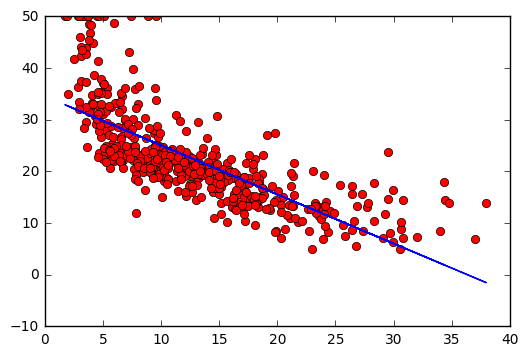

In [108]:
# plot the regression
plt.plot(bos['LSTAT'], bos['PRICE'], 'ro')
plt.plot(bos['LSTAT'], res.fittedvalues, 'b')

from the plot above we can see there is evidence for non linear data.

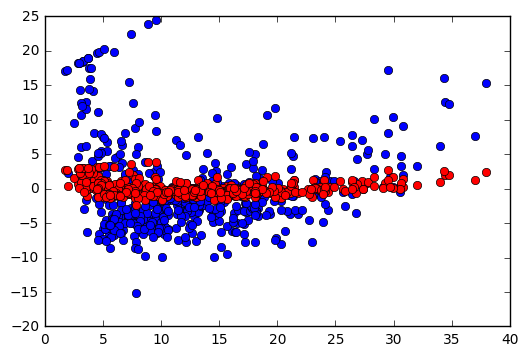

In [114]:
# plotting the residuals
# plt.plot(bos['LSTAT'], res.fittedvalues, 'b')
# TODO what is the difference between pearson_resid and normal resid
# TODO what is the significance of the studentized residuals and plain residuals
plt.plot(bos['LSTAT'], res.resid, 'bo')
plt.plot(bos['LSTAT'], res.resid_pearson, 'ro')

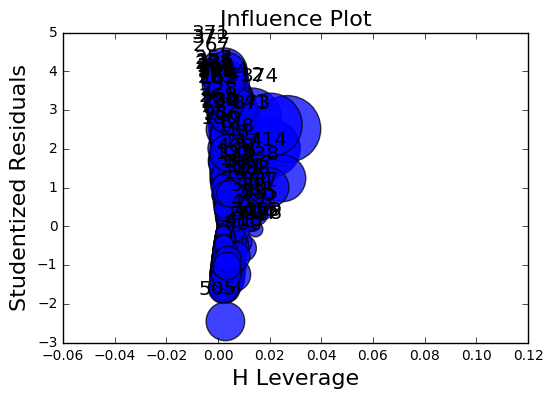

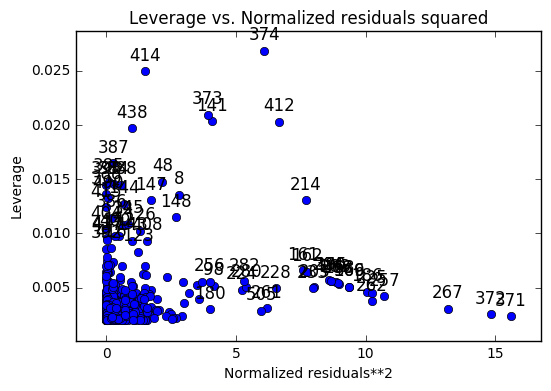

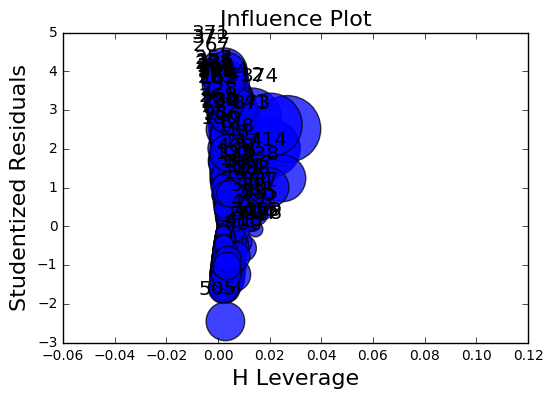

In [118]:
# TODO why is this printing dups
# TODO explain what is happening with the plots
from statsmodels.graphics.regressionplots import plot_leverage_resid2, influence_plot
plot_leverage_resid2(res)
influence_plot(res)

# Multiple Linear Regression

model with three predictors

In [119]:
res = sm.ols("PRICE ~ LSTAT + AGE", bos).fit()

In [120]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           2.98e-88
Time:                        05:10:38   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000        31.787    34.659
LSTAT         -1.0321      0.048    -21.416      0.000        -1.127    -0.937
AGE            0.0345      0.012      2.826      0.005         0.011     0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [136]:
# TODO find proper way to do multiple linear regression
res = sm.ols("PRICE~{}".format('+'.join([ii for ii in bos.columns if ii is not 'PRICE'])), bos).fit()

In [137]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 24 Jan 2017   Prob (F-statistic):          6.95e-135
Time:                        05:17:31   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [142]:
# need the car dataset for vif demonstration

# Regression with Interaction Terms

In [140]:

res = sm.ols('PRICE ~ LSTAT*AGE', bos).fit()

In [141]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Tue, 24 Jan 2017   Prob (F-statistic):           4.86e-88
Time:                        05:45:10   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000        33.201    38.976
LSTAT         -1.3921      0.167     -8.313      0.000        -1.721    -1.063
AGE           -0.0007      0.020     -0.036      0.971        -0.040     0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025         0.001     0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Non linear Regression

In [145]:
res = sm.ols('PRICE ~ LSTAT + pow(LSTAT,2)', bos).fit()

In [146]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 24 Jan 2017   Prob (F-statistic):          1.56e-112
Time:                        19:52:54   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000        41.149    44.575
LSTAT            -2.3328      0.124    -18.843      0.000        -2.576    -2.090
pow(LSTAT, 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

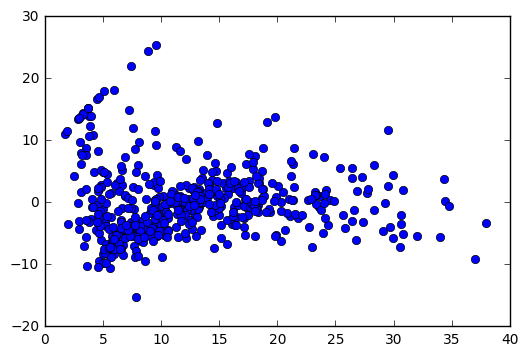

In [147]:
# TODO anova in python
# it compares the fit between models
# null hyp is that models fit the data equally well -- as stated by the F-statistic
plt.plot(bos['LSTAT'], res.resid, 'bo')

In [161]:
# TODO is there an equivalent of R's poly() in python
import math
bos['LOG_RM'] = pd.Series(map(math.log, bos['RM']))
res = sm.ols('PRICE ~ LOG_RM', bos).fit()

PatsyError: Error evaluating factor: TypeError: cannot convert the series to <class 'float'>
    PRICE ~ math.log(RM)
            ^^^^^^^^^^^^

In [156]:
log_rm = map(math.log, bos['RM'])

# Applied section

In [28]:
auto_df = pd.read_csv("../input/Auto.data.txt", delim_whitespace=True)

In [29]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [30]:
# remove dud values
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype(float)

In [32]:
res = sm.ols("mpg ~ horsepower", auto_df).fit()

In [33]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 28 Jan 2017   Prob (F-statistic):           7.03e-81
Time:                        07:33:56   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000        38.525    41.347
horsepower    -0.1578      0.006    -24.489      0.000        -0.171    -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

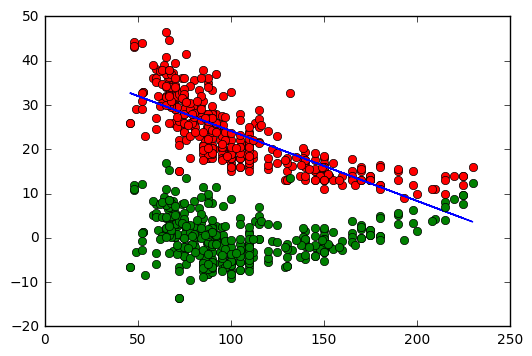

In [57]:
plt.plot(auto_df['horsepower'], auto_df['mpg'],  'ro')
plt.plot(auto_df['horsepower'], res.fittedvalues, 'b')



In [37]:
auto_df["predict_horsepower"] = res.fittedvalues

In [38]:
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,predict,predict_horsepower
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,19.416046,19.416046
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,13.891480,13.891480
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,16.259151,16.259151
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.259151,16.259151
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.837598,17.837598
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,ford galaxie 500,8.682604,8.682604
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala,5.210020,5.210020
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii,5.999243,5.999243
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,pontiac catalina,4.420796,4.420796
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl,9.945362,9.945362


In [44]:
# predicting the exogenous response
exog_horsepower = 98
pred = res.predict(exog={"horsepower": exog_horsepower})[0]

In [54]:
# TODO cleanup after the interface is modified

a,b,c = map(float, supporting_statistics(auto_df['horsepower']))
rse = get_rse(res)
ii, jj = (98, pred)


print(confidence_intervals(ii, jj, a, b, c, rse))
print(prediction_intervals(ii, jj, a, b, c, rse))

(23.971565959860108, 24.962588345164768)
(14.780157119947706, 34.153997185077174)


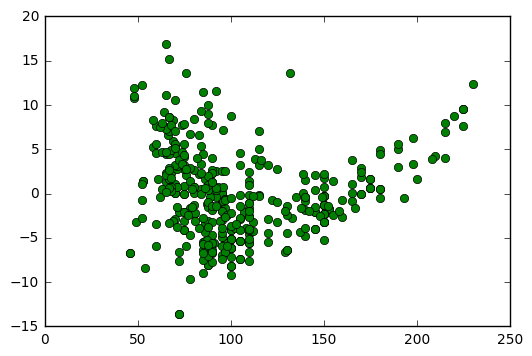

In [61]:
# some diagnostic plots of the regression

# plot of the residuals
plt.plot(auto_df['horsepower'], res.resid, 'go')

# the residuals seem to follow 

In [75]:
# TODO what else is a good diagnostic plot for regression?
#   - leverage plot, 

# Applied Multiple Regression

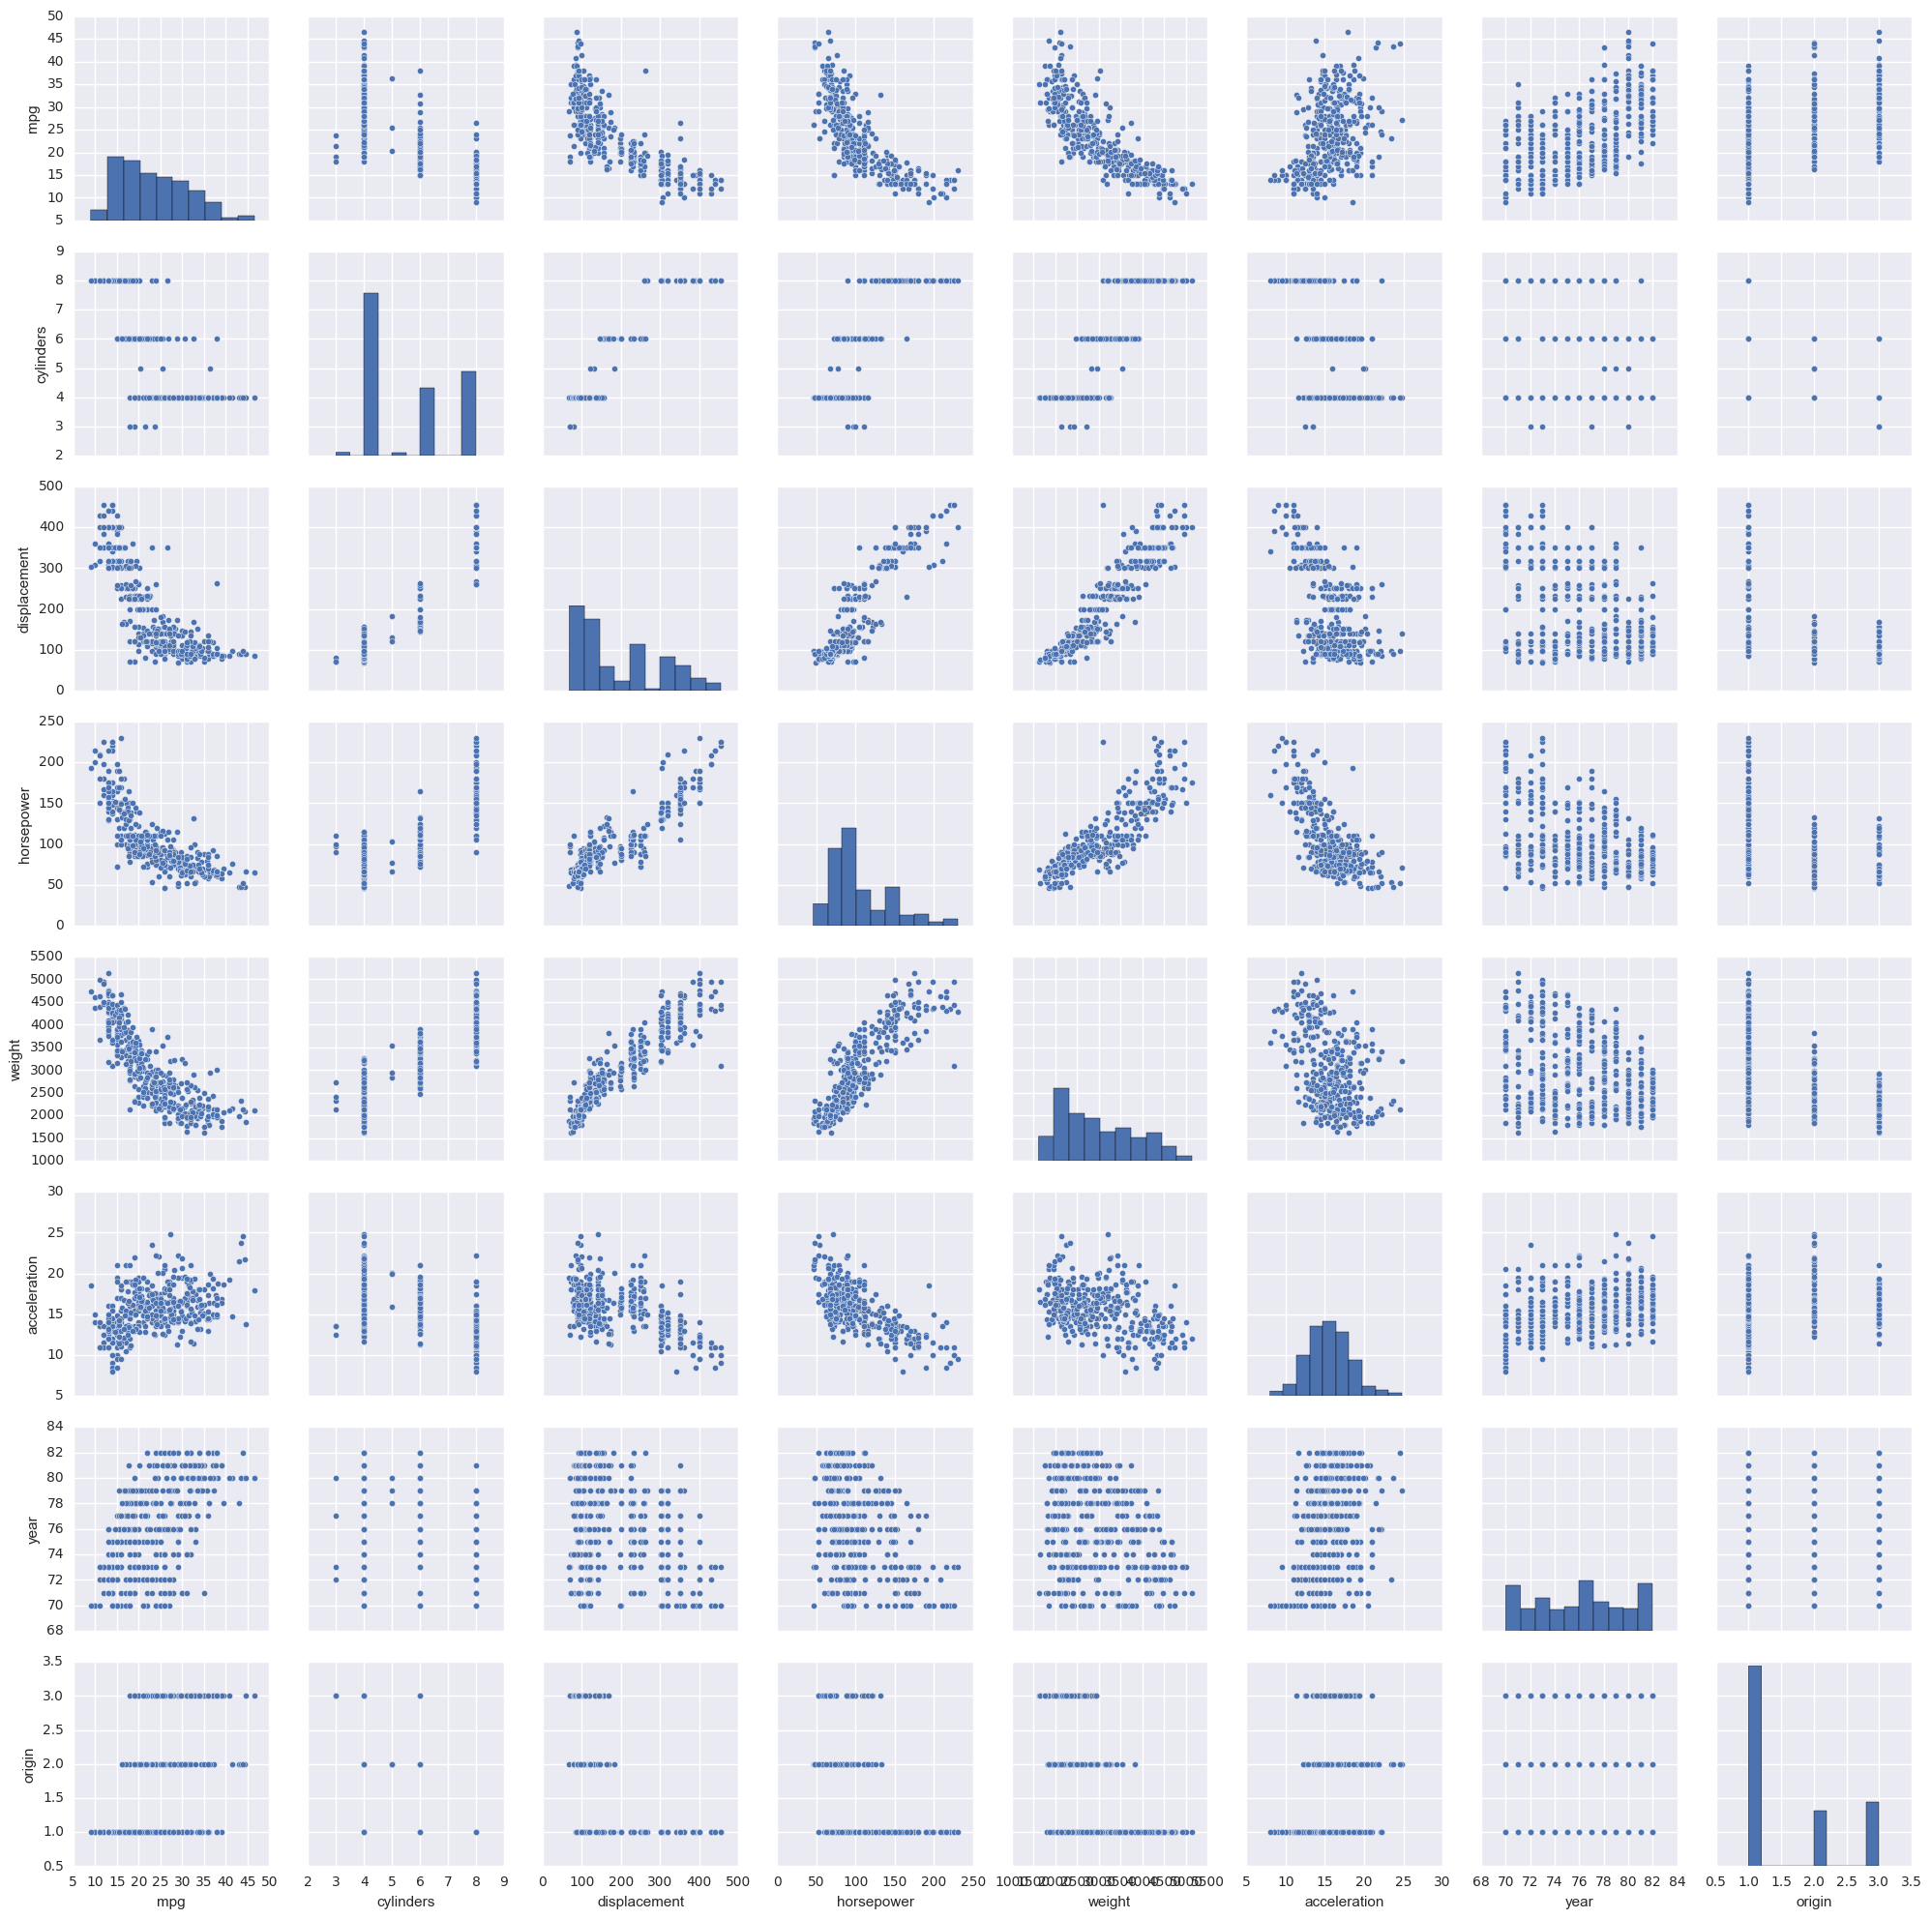

In [103]:
# scatterplot matrix
auto_df = pd.read_csv("../input/Auto.data.txt", delim_whitespace=True)

# remove dud values
auto_df = auto_df[auto_df['horsepower'] != '?']
auto_df['horsepower'] = auto_df['horsepower'].astype(float)


sns.pairplot(auto_df)
# neat way to have a quick glance over the relationships between all the predictors

In [104]:
# matrix of correlations
auto_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [105]:
# multiple linear regression
predictors = list(auto_df.columns)

In [106]:
predictors.remove('name')
predictors.remove('mpg')

In [107]:
import statsmodels.api as sma
y = auto_df['mpg']
X = auto_df[predictors]
X = sma.add_constant(X)
res = sma.OLS(y, X).fit()

In [108]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sat, 28 Jan 2017   Prob (F-statistic):          2.04e-139
Time:                        10:30:16   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000       -26.350    -8.087
cylinders       -0.4934      0.323     -1.526      0.128        -1.129     0.142
displacement     0.0199      0.008      2.647      0.008         0.005     0.035
horsepower      -0.0170      0.014     -1.230      0.220        -0.044     0.010
weight          -0.0065      0.001     -9.929      0.000        -0.008    -0.005
acceleration     0.0806      0.099      0.815      0.415        -0.114     0.275
year             0.7508      0.051     14.729      0.000         0.651     0.851
origin           1.4261      0.278      5.127      0.000         0.879     1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# is there a relationship between the predictors and the response

# Do the t-test where all beta co-efficients are zero in python


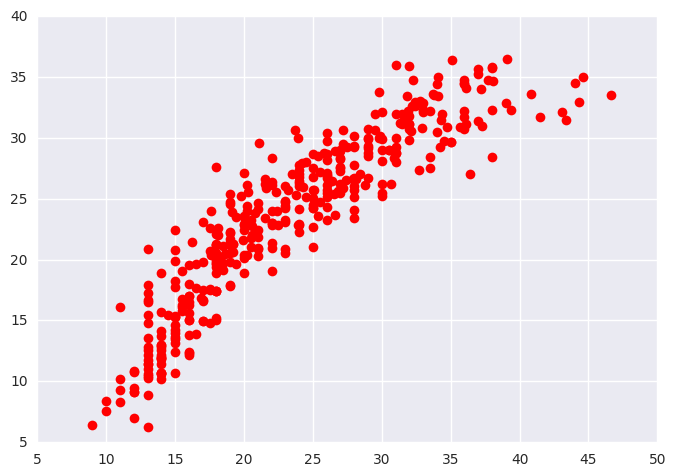

In [114]:
# 4 kinds of diagnostic plots
# - residual vs fitted
# TODO why the resid's scalar values
# shouldnt they be in the p-1 dimension
plt.plot(auto_df['mpg'], res.fittedvalues, 'ro')
# - Normal QQ
# - Scale location
# - Residuals vs Leverage


In [ ]:
# TODO multiple linear regression with interaction effects

In [115]:
# TODO mulitple linear regression with easy transformation of certain predictors

In [116]:
# where is the car seats data
# car_seats_df = pd.load_csv('../input/')

In [173]:
import random

In [183]:
# question 11
random.seed(1)
_X = [random.normalvariate(0, 1) for _ in range(100)]
_y = [2 * _X[ii] + random.normalvariate(0, 1) for ii in range(100)]

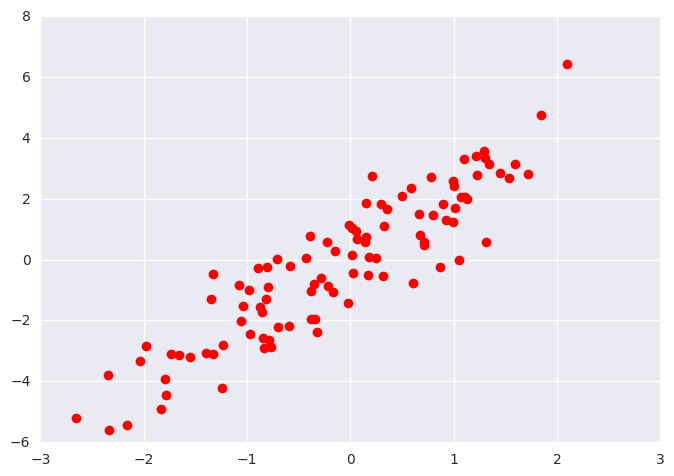

In [185]:
plt.plot(_X, _y, 'ro')

In [187]:
# regression without an intercept
# TODO see how to force intercept to be 0
X = sma.add_constant(_X)
y = _y
res = sma.OLS(y, X, hasconst=0).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     237.0
Date:                Sun, 29 Jan 2017   Prob (F-statistic):           2.89e-38
Time:                        09:00:00   Log-Likelihood:                -141.77
No. Observations:                 100   AIC:                             287.5
Df Residuals:                      98   BIC:                             292.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          0.0534      0.102      0.526      0.600        -0.148     0.255
x1             2.0197      0.093     21.681      0.000         1.835     2.205
==============================================================================
Omnibus:                        1.527   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.466   Jarque-Bera (JB):                1.261
Skew:                          -0.074   Prob(JB):                        0.532
Kurtosis:                       2.470   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [186]:
X = _X
y = sma.add_constant(_y)
res = sma.OLS(X, y).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     470.1
Date:                Sun, 29 Jan 2017   Prob (F-statistic):           3.55e-39
Time:                        08:59:52   Log-Likelihood:                -62.007
No. Observations:                 100   AIC:                             128.0
Df Residuals:                      98   BIC:                             133.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -0.0433      0.046     -0.950      0.344        -0.134     0.047
x1             0.4097      0.019     21.681      0.000         0.372     0.447
==============================================================================
Omnibus:                        0.269   Durbin-Watson:                   2.123
Prob(Omnibus):                  0.874   Jarque-Bera (JB):                0.413
Skew:                           0.103   Prob(JB):                        0.814
Kurtosis:                       2.763   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Collinearity exercise

In [188]:
# TODO complete once you figure out proper way
# to create a normally distributed dataset

random.seed(1)
# TODO what is runif in R


In [204]:
# q15 predicting per captia crime rate

boston = load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos["PRICE"] = boston.target

In [206]:
predictors = [x for x in bos.columns if x not in ['PRICE', 'CRIM']]


In [207]:
bos[predictors]

,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [208]:
# multiple linear regression vs individual simple linear regression
res = sma.OLS(bos['CRIM'], bos[predictors]).fit()

In [209]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CRIM   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     44.24
Date:                Sun, 29 Jan 2017   Prob (F-statistic):           1.61e-70
Time:                        10:16:51   Log-Likelihood:                -1662.3
No. Observations:                 506   AIC:                             3349.
Df Residuals:                     494   BIC:                             3399.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
ZN             0.0373      0.019      1.978      0.049         0.000     0.074
INDUS         -0.0745      0.085     -0.881      0.379        -0.241     0.092
CHAS          -1.2628      1.186     -1.065      0.287        -3.593     1.067
NOX           -3.0300      4.410     -0.687      0.492       -11.694     5.634
RM             0.2184      0.406      0.538      0.591        -0.579     1.016
AGE           -0.0004      0.018     -0.020      0.984        -0.036     0.035
DIS           -0.5745      0.256     -2.247      0.025        -1.077    -0.072
RAD            0.5033      0.085      5.944      0.000         0.337     0.670
TAX           -0.0005      0.005     -0.094      0.925        -0.011     0.010
PTRATIO        0.0690      0.144      0.478      0.633        -0.214     0.352
B             -0.0074      0.004     -2.089      0.037        -0.014    -0.000
LSTAT          0.2629      0.066      4.007      0.000         0.134     0.392
==============================================================================
Omnibus:                      676.980   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91159.699
Skew:                           6.788   Prob(JB):                         0.00
Kurtosis:                      67.339   Cond. No.                     8.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

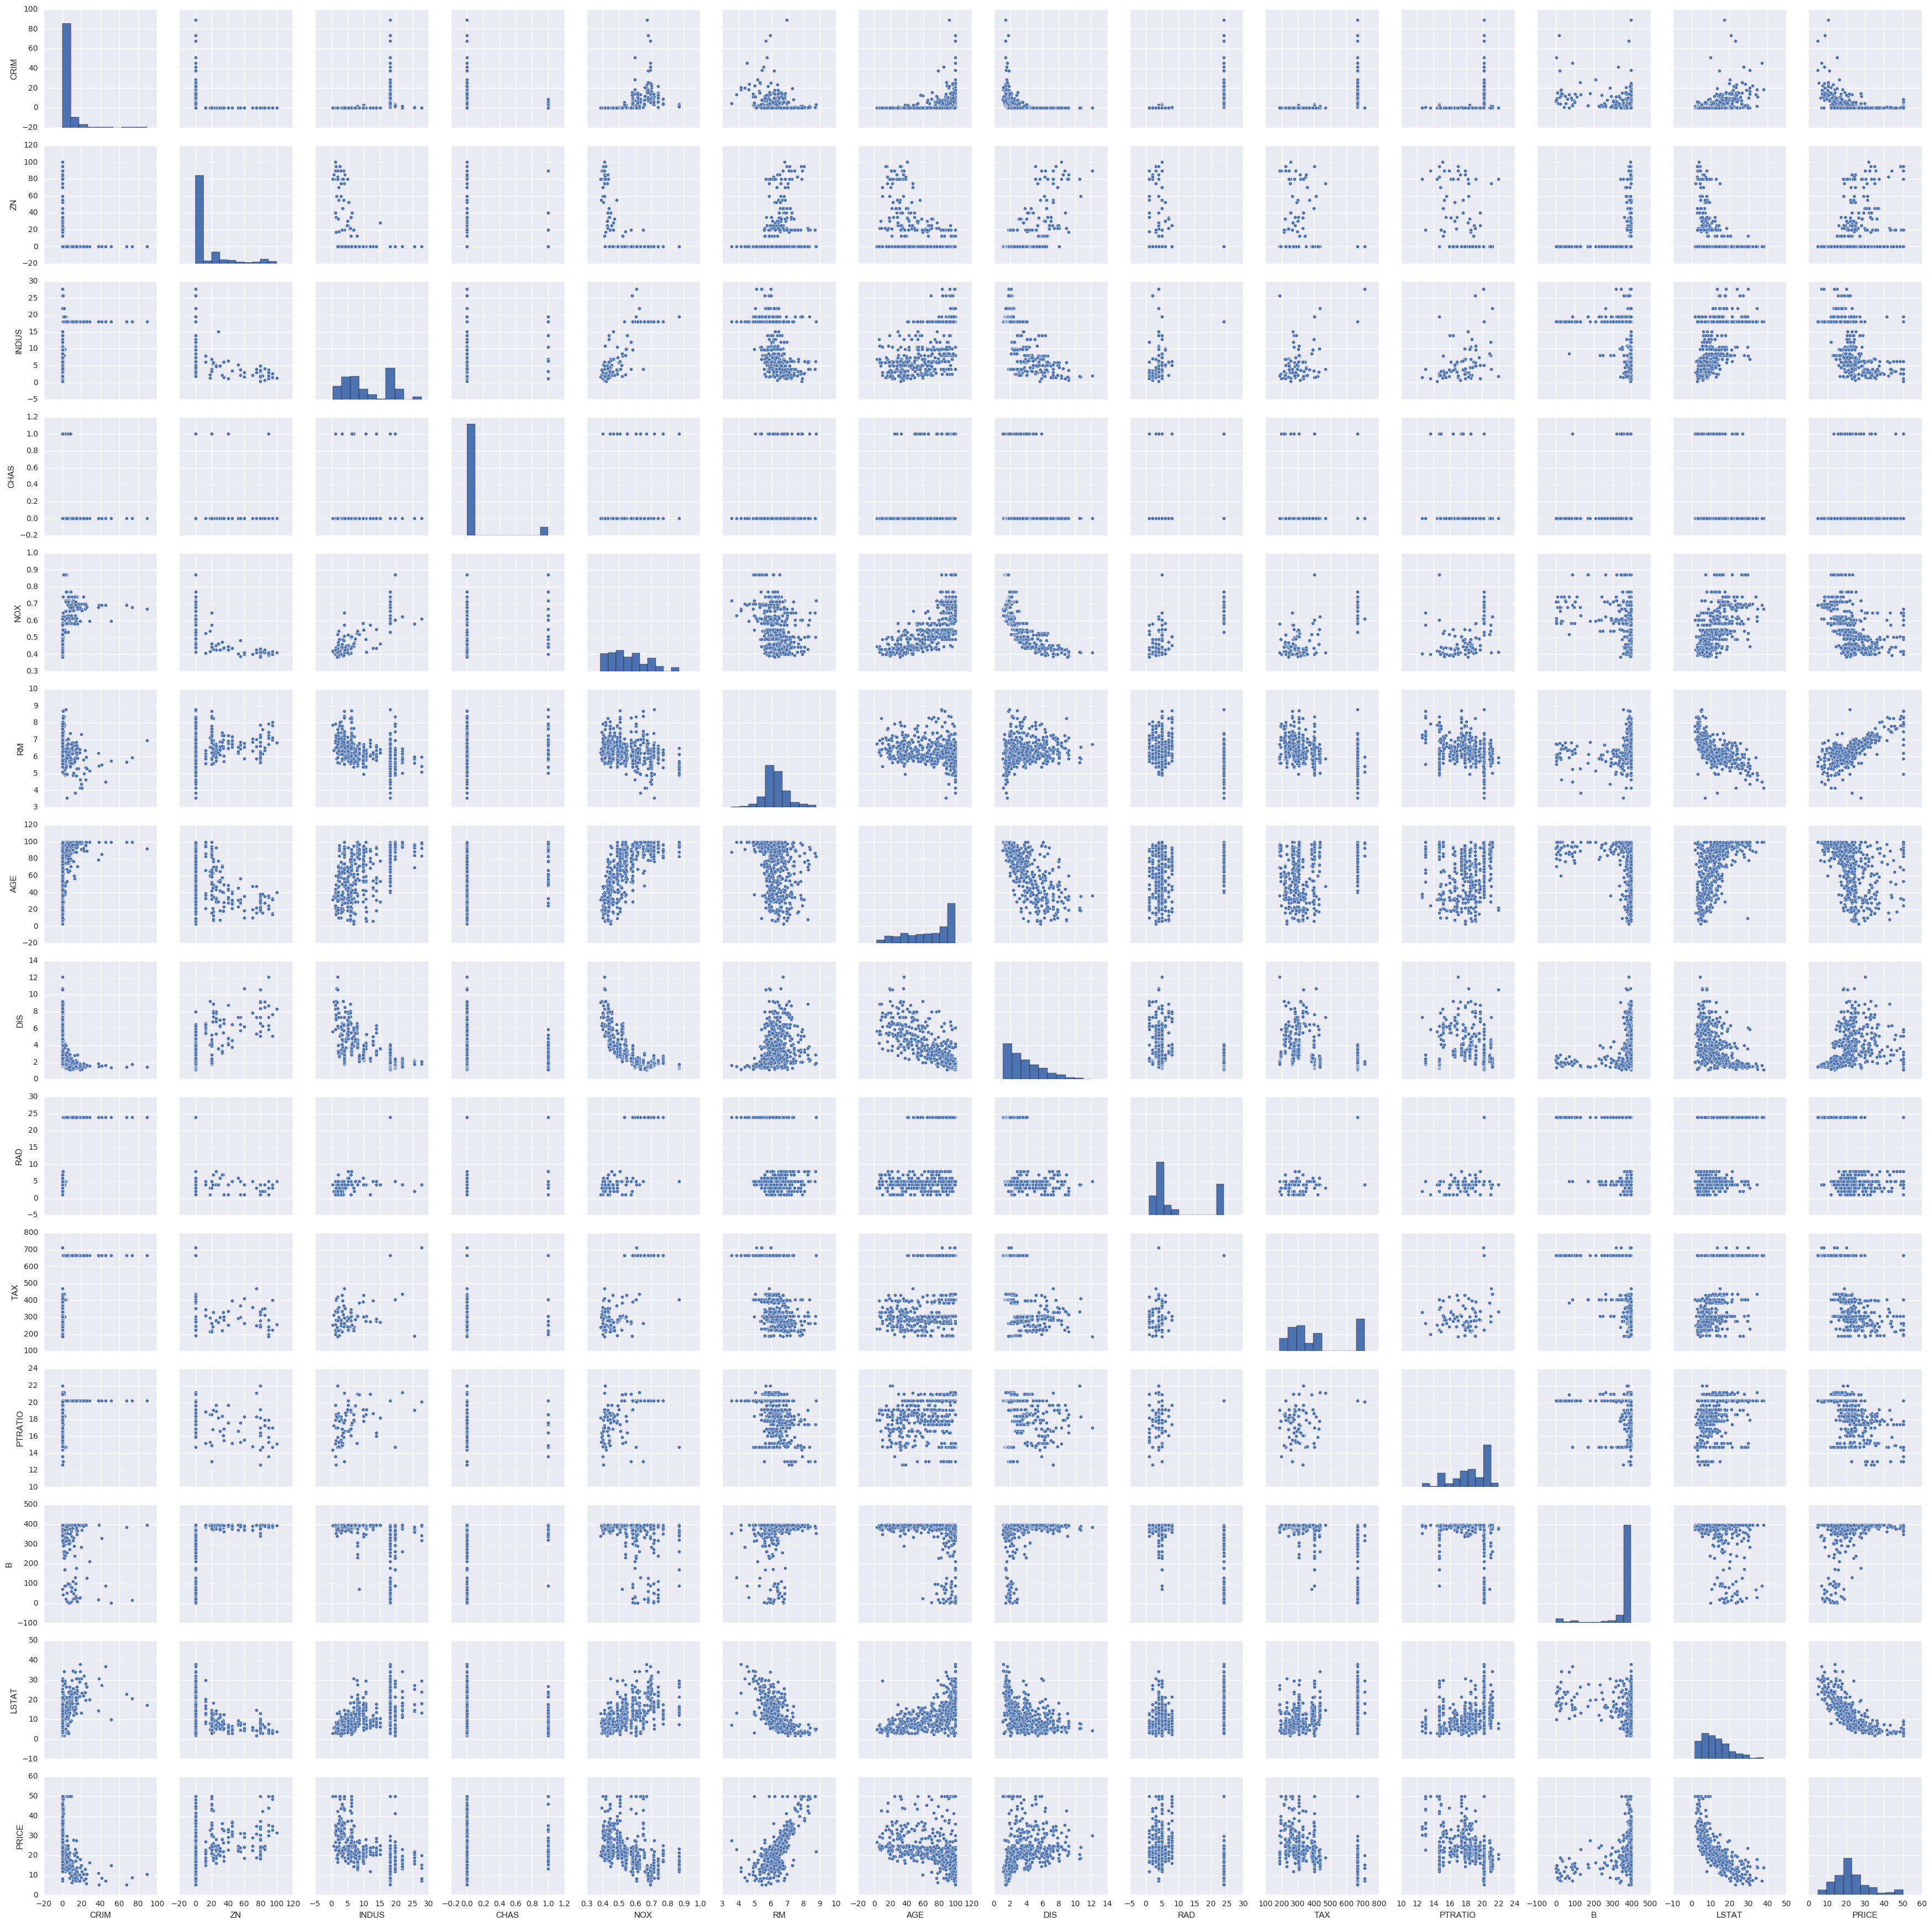

In [211]:
sns.pairplot(bos)